# Ejercicio de regresión

### Nombre: Diana Milena Chaparro Macias
### Fecha: Agosto 2025
### Curso: Bootcamp Data Science


## Librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format

### 1. Explorar los datos
Revisar  el número de registros, tipos de variables (numéricas vs.categóricas), valores faltantes y posibles valores atípicos.

Analiza la distribución de cada variable y las correlaciones con el target
("Calories").

In [ ]:
#Se importa la base de datos a trabajar a través de kaggle.

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path_train = "train.csv"
file_path_test = "test.csv"

# Load the latest version
df_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/predict-calorie-expenditure",
  file_path_train,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# Load the latest version
df_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/predict-calorie-expenditure",
  file_path_test,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df_train.head())

/tmp/ipython-input-2089273728.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_train = kagglehub.load_dataset(


100%|██████████| 33.8M/33.8M [00:00<00:00, 71.9MB/s]
/tmp/ipython-input-2089273728.py:22: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_test = kagglehub.load_dataset(


First 5 records:    id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36  189.00   82.00     26.00      101.00      41.00    150.00
1   1  female   64  163.00   60.00      8.00       85.00      39.70     34.00
2   2  female   51  161.00   64.00      7.00       84.00      39.80     29.00
3   3    male   20  192.00   90.00     25.00      105.00      40.70    140.00
4   4  female   38  166.00   61.00     25.00      102.00      40.60    146.00


### Limpiar y preprocesar la información

Imputar o eliminar valores faltantes si existen.

Codificar variables categóricas como “Gender” (por ejemplo, 0 = femenino, 1 = masculino).

Escalar variables numéricas si es necesario (por ejemplo, con StandardScaler).

Divide el dataset en conjuntos de entrenamiento y prueba.

In [ ]:
#Como la columna ID es identificador de registro, se elimina
df_train.drop(columns="id", inplace=True)
#Vistazo al dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.8+ MB


In [ ]:
#Buscamos nulos
df_train.isnull().sum()

,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [ ]:
#Revisar duplicados en df train
print(f"Duplicados: {df_train.duplicated().sum()}")

Duplicados: 2841


In [ ]:
#Se eliminan valores duplicados
df_train.drop_duplicates(inplace=True)

In [ ]:
#Se procesa la columna sex
df_train["Sex"] = df_train["Sex"].map({"male": 0, "female": 1})

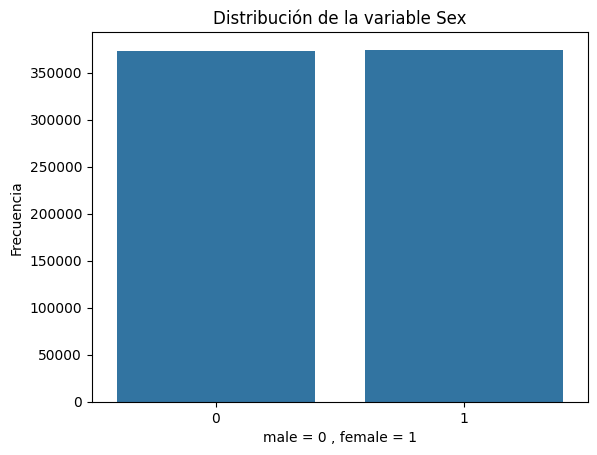

In [ ]:
# Revisar la distribución de las variables sex mediante grafica de barras, con titulo y labels
sns.countplot(x="Sex", data=df_train)
plt.title("Distribución de la variable Sex")
plt.ylabel("Frecuencia")
plt.xlabel('male = 0 , female = 1')
plt.show()

In [ ]:
#Utiliza la regla de Stuger's para calcular el número estmado de bins para un histograma
num_bins = int(1 + np.log2(len(df_train)))
print(num_bins)

20


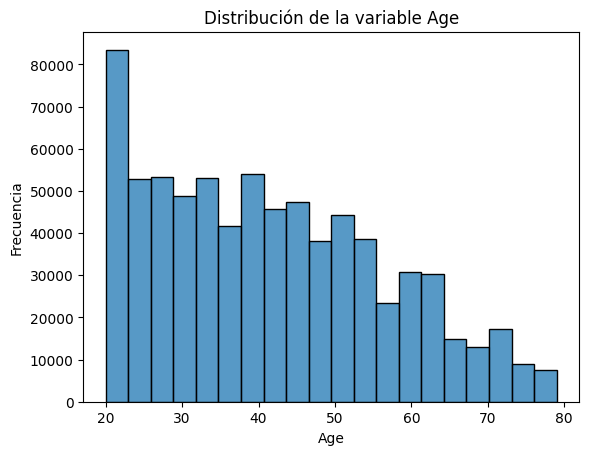

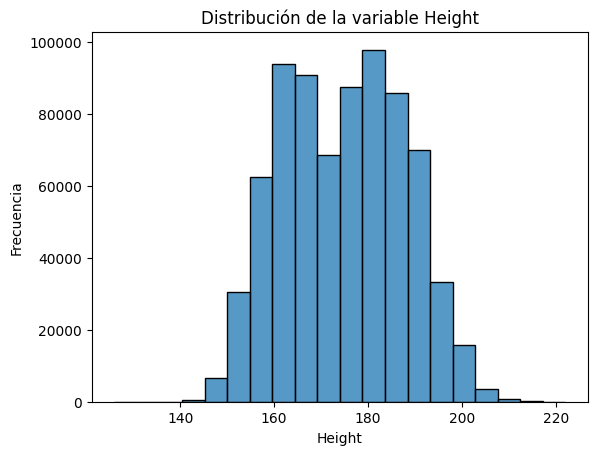

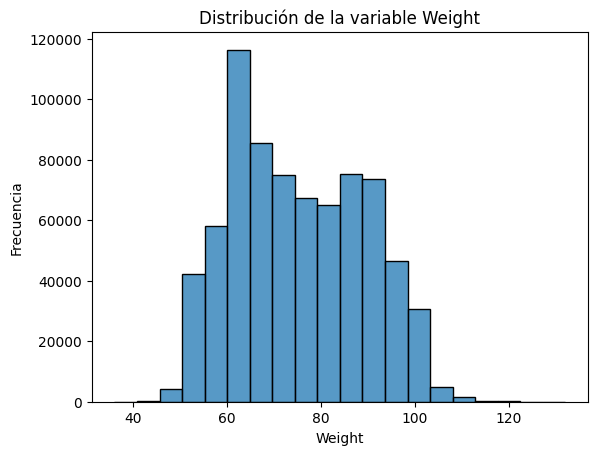

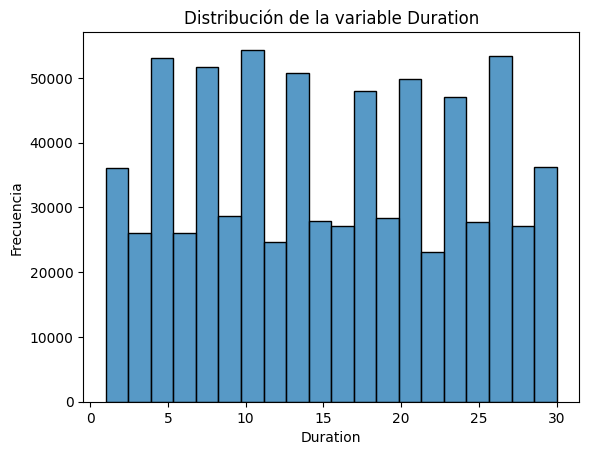

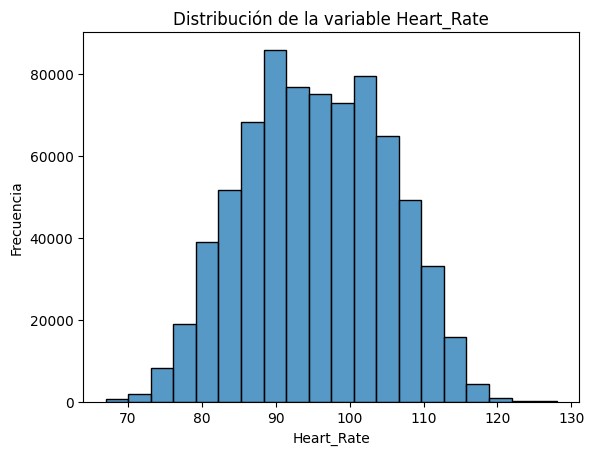

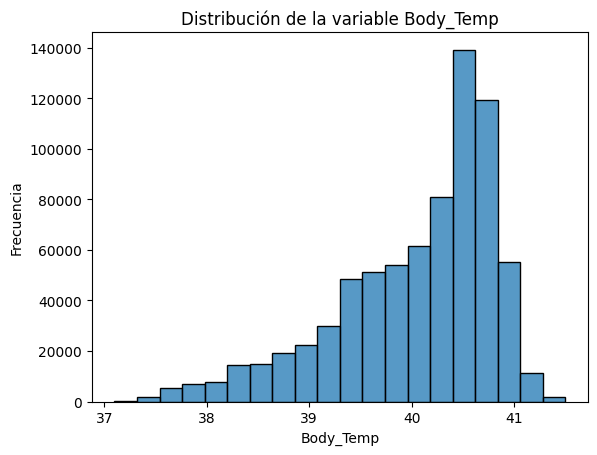

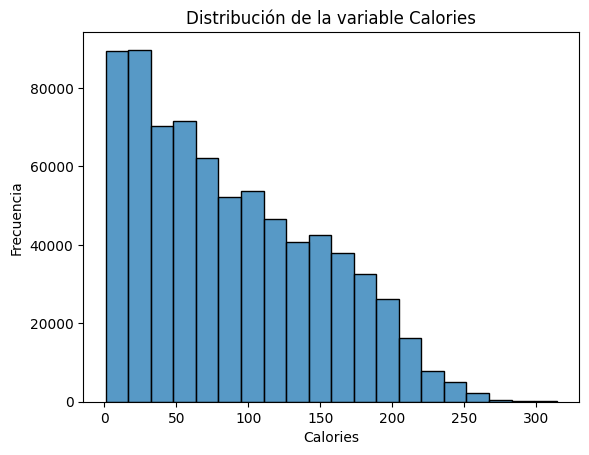

In [ ]:
#Mediante histogramas se visualiza la distribución de los datos
for col in df_train.columns:
  if(col!="Sex"):
    sns.histplot(x=df_train[col], bins = num_bins)
    plt.title("Distribución de la variable " + col)
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.show()

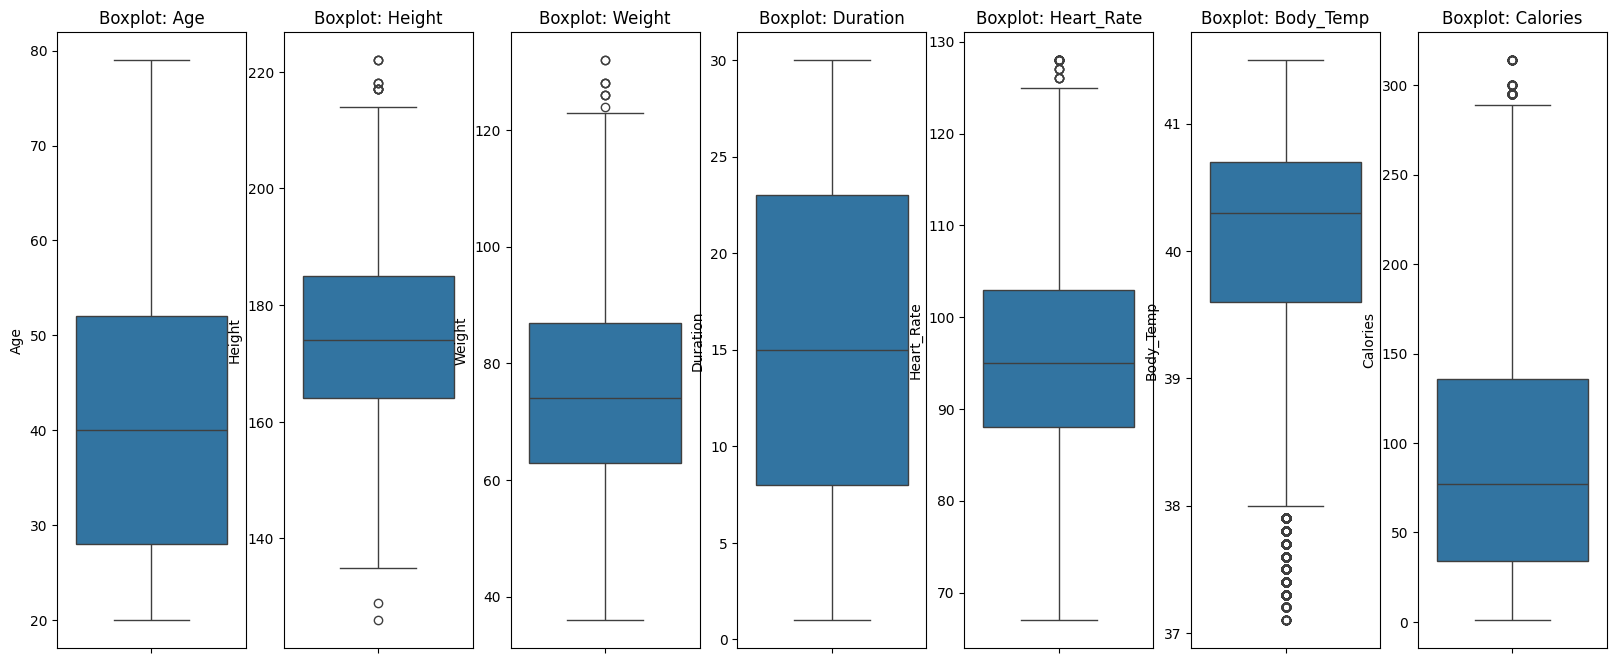

In [ ]:
#Mediante bloxplot se visualizan las columnas numéricas
numeric_columns=df_train.columns
numeric_columns=numeric_columns.drop("Sex")
fig, axs = plt.subplots(1,
                        7,
                        figsize=(20,8))
for i, ax in enumerate(axs.flatten()):
    if i < len(numeric_columns):
        ax.set_title("Boxplot: " +
                     f'{numeric_columns[i]}')
        sns.boxplot(df_train[numeric_columns[i]], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

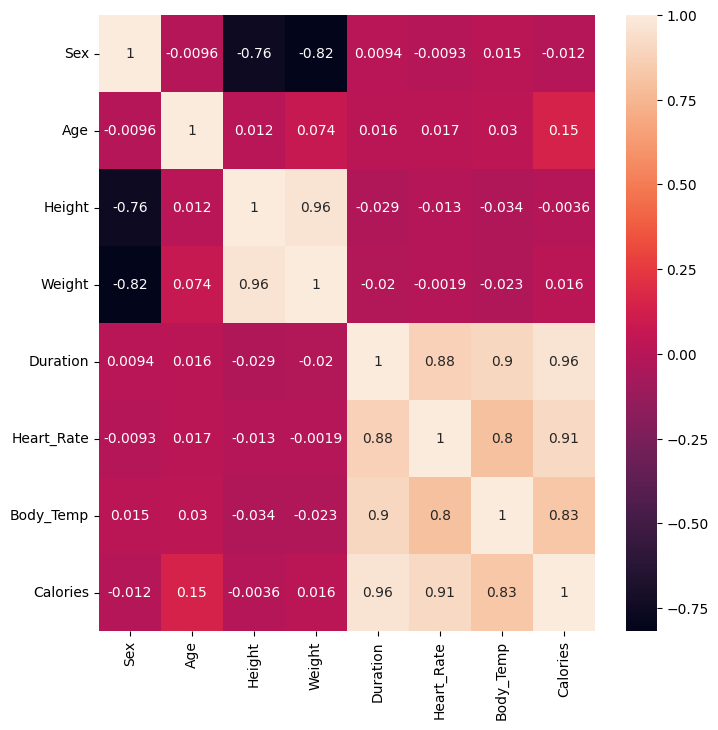

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

En la limpieza y procesamiento de los datos se eliminó la columna ID, se eliminaron los duplicados, se categorizó la columna sex, donde 0 es hombre y 1 es mujer. Se visualizaron los datos y se encontró que:
* La edad de la mayoría de los datos se encuentra entre 30 y 50 años.
* La estatura de la mayoría de personas se concentra entre 165 y 185 cm
* El peso de la mayoría de personas está entre 62 y 85 kg
* La duración de la actividad la mayoría de personas se encuentra entre los 7 y 23 minutos
* La temperatura corporal de la mayoría de las personas se encuentra entre los 39.7 y 40.7 °C
* El gasto calórico de la mayoría de las personas se concentra entre 45 y 145.


## Preprocesamiento de datos

### Estandarizar las variables

In [ ]:
#Estandarizar las variables mediante la funcion StandarScaler
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train)

In [ ]:
#Se elimina la variable calories
columnas = df_train.columns
columnas = columnas.drop("Calories")
target_col = 'Calories'

In [ ]:
X = df_train_scaled[:, :-1]
y = df_train[target_col]

In [ ]:
#Se separa la base de datos X y Y con la función train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocesamiento

## Entrenamiento y evaluación
Entrenar uno o más modelos utilizando .fit()

Escoger al menos 3 modelos de regresión.

Entrenar cada modelo usando el conjunto de entrenamiento.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "DT": DecisionTreeRegressor(random_state=42),
    "RF": RandomForestRegressor(random_state=42,  max_features="sqrt",max_depth=20, min_samples_split=5, n_estimators=600, n_jobs=-1),
    "XGB": XGBRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        tree_method="hist",
        eval_metric="rmse",
        n_jobs=-1
    ),
    "GB": GradientBoostingRegressor(random_state=42, n_estimators=600, learning_rate=0.05, max_depth=3)
}
rows = []
fitted = {}
for name, reg in models.items():
  print(name)
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  rows.append({
  "Modelo": name, "R2": r2, "MAE": mae, "RMSE": rmse,
  })
  fitted[name] = reg

DT
RF
XGB
GB


Primero se importan los modelos de regresión así como las métricas.

En este caso se tienen en cuenta las métricas de error cuadratico médio, error absoluto medio y r2.


Se crea un diccionario con los modelos a trabajar, en este caso son 4 decisionTreeRegressor, RandomForestRegressor, XGBRegressor y GradientBoostingRegressor, cada uno con hiperparámetros específicos.
Se realiza entrenamiento de los modelos y evaluación del mismo, se almacenan los resultados obtenidos en la variable fitted.



### Comparación de Modelos

Compara el rendimiento utilizando métricas como MAE (Mean Absolute Error), RMSE (Root Mean Squared Error) y R².

Graficar los resultados para un análisis visual del desempeño del modelo.

In [ ]:
results_df = pd.DataFrame(rows).sort_values(by=["R2","MAE"], ascending=[False, True]).reset_index(drop=True)
print(results_df)

  Modelo   R2  MAE  RMSE
0    XGB 1.00 2.15  3.56
1     RF 1.00 2.22  3.72
2     GB 1.00 2.66  4.07
3     DT 0.99 3.13  5.22


De acuerdo a los resultados obtenidos, se evidencia que el mejor modelo es **XGB** donde:


*   R2 (Coeficiente de determinación) me indica que el modelo precide muy bien.
*   MAE (Error Absoluto Medio) me indica que el error promedio a la hora de predecir son 2 calorias, lo cual es un buen puntaje.
*   RMSE (Raiz del error cuadratico medio) me indica que tanto error puede tener el modelo, en este caso se puede observar que el error más grande puede ser 3.56, lo cual sigue siento un valor bajo.



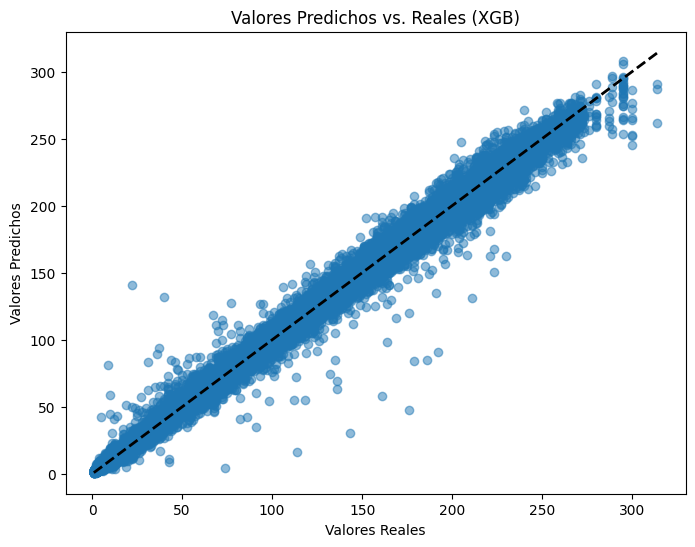

In [ ]:
# Realizar predicciones con el modelo con mejor resultado

y_pred = fitted['XGB'].predict(X_test)

# Crear un gráfico de dispersión de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Reales (XGB)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.show()

### Predicción

In [ ]:
df_test.drop('id', axis=1, inplace=True)
df_test["Sex"] = df_test["Sex"].map({"male": 0, "female": 1})

In [ ]:
scaler = StandardScaler()
df_test_scaled = scaler.fit_transform(df_test)

In [ ]:
# predict on test data
test_predictions = fitted['XGB'].predict(df_test_scaled)
df_test['Calories'] = test_predictions

In [ ]:
df_test.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,45,177.00,81.00,7.00,87.00,39.80,27.10
1,0,26,200.00,97.00,20.00,101.00,40.50,107.36
2,1,29,188.00,85.00,16.00,102.00,40.40,85.13
3,1,39,172.00,73.00,20.00,107.00,40.60,126.35
4,1,30,173.00,67.00,16.00,94.00,40.50,66.16


Con los resultados de la predicción, se puede evidenciar que se obtienen valores lógicos de acuerdo a los datos de cada paciente, ya que entre más tiempo de duración tiene la actividad, más calorias son las que gasta el paciente.